In [6]:
import sys
import numpy as np
import pandas as pd
from tqdm import tqdm
from spacy.vocab import Vocab
from collections import defaultdict
import matplotlib.pyplot as plt

In [2]:
dataset_path = '../src/loaders'
sys.path.append(dataset_path)
from CRD3Dataset import CRD3Dataset

In [3]:
cfg_path = '../src/loaders/CRD3Dataset_all.yaml'
dataset = CRD3Dataset(cfg_path)

In [7]:
parsing_tokenizer = dataset.get_tokenizer()
n_chunks = 0
min_utt = ''
max_utt = ''
utt_lens = []
min_summary = ''
max_summary = ''
summ_lens = []

for _, utts, summ in dataset.iter_chunk():
    n_chunks += 1
    n_utt_tokens = len(parsing_tokenizer(' '.join(utts)))
    utt_lens.append(n_utt_tokens)
    if n_utt_tokens < min(utt_lens):
        min_utt = ' '.join(utts)
    elif n_utt_tokens > max(utt_lens):
        max_utt = ' '.join(utts)
    n_summ_tokens = len(parsing_tokenizer(summ))
    summ_lens.append(n_summ_tokens)
    if n_summ_tokens < min(summ_lens):
        min_summary = summ
    elif n_summ_tokens > max(summ_lens):
        max_summary = summ

print('Chunks:', n_chunks)
print('Min utterances token length:', min(utt_lens))
print('Min utterances:')
print(min_utt)
print('Max utterances token length:', max(utt_lens))
print('Max utterances:')
print(max_utt)
print('Min summary token length:', min(summ_lens))
print('Min summary:')
print(min_summary)
print('Max summary token length:', max(summ_lens))
print('Max summary:')
print(max_summary)

Chunks: 18378
Min utterances token length: 2
Min utterances:

Max utterances token length: 48696
Max utterances:

Min summary token length: 0
Min summary:

Max summary token length: 680
Max summary:



<Figure size 640x480 with 0 Axes>

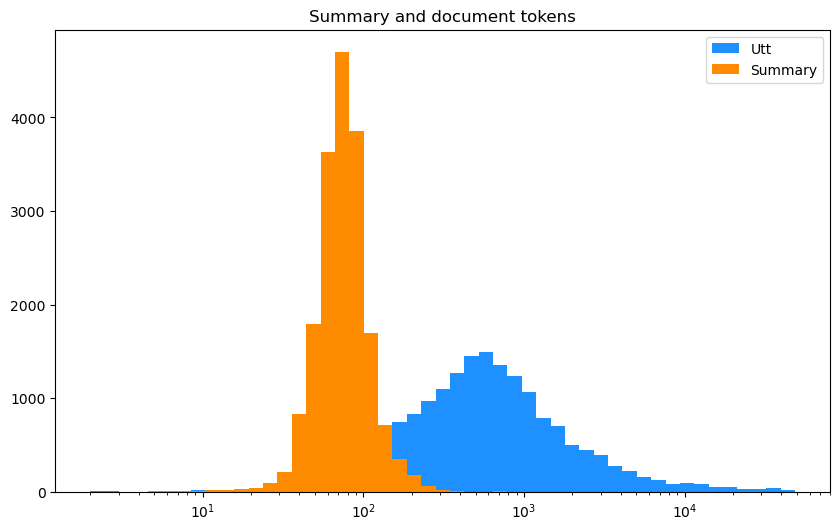

<Figure size 640x480 with 0 Axes>

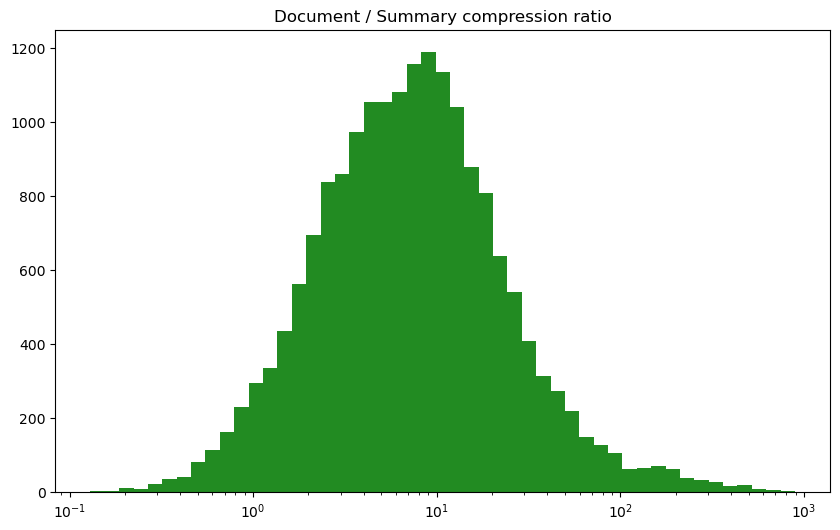

In [24]:
plt.clf()
_ = plt.subplots(figsize=(10, 6))
bins = np.logspace(np.log10(min(utt_lens)), np.log10(max(utt_lens)))
plt.hist(utt_lens, label='Utt', color='dodgerblue', bins=bins)
plt.hist(summ_lens, label='Summary', color='darkorange', bins=bins)
plt.xscale('log')
plt.legend()
plt.title('Summary and document tokens')
plt.show()

plt.clf()
_ = plt.subplots(figsize=(10, 6))
ratios = [float(u) / float(s) for u, s in zip(utt_lens, summ_lens) if s != 0]
bins = np.logspace(np.log10(min(ratios)), np.log10(max(ratios)))
plt.hist(ratios, color='forestgreen', bins=bins)
plt.xscale('log')
plt.title('Document / Summary compression ratio')
plt.show()

In [152]:
def get_tokens():
    # Extract tokens from all the data
    tokenizer = dataset.get_tokenizer()
    tokens = defaultdict(lambda: 0)
    speaker_tokens = defaultdict(lambda: 0)

    # CRD3 Data
    for speaker_strings, utt_strings, summary_string in tqdm(dataset.iter_chunk(), total=n_chunks):
        for token in tokenizer(summary_string.lower()):
            tokens[token.text] += 1
        for token in (t for s in speaker_strings for t in tokenizer(s.lower())):
            speaker_tokens[token.text] += 1
        for token in (t for s in utt_strings for t in tokenizer(s.lower())):
            tokens[token.text] += 1

    # Campaign 3 ep. 1
    with open('../data/C3E001.txt', 'r') as f:
        for line in f:
            try:
                speaker_idx = line.index(':')
            except Exception as e:
                print(line)
                raise e
            speaker_strings = line[:speaker_idx].lower()
            speaker_strings = speaker_strings.replace('and', '')  # Remove 'and' from speakers
            utt_strings = line[speaker_idx + 1:].lower()

            for token in (t for t in tokenizer(speaker_strings)):
                speaker_tokens[token.text] += 1
            for token in (t for t in tokenizer(utt_strings)):
                tokens[token.text] += 1

    # Episode blurbs from the fandom
    blurb_df = pd.read_csv('../data/CR_blurbs.tsv', sep='\t')
    for token in (t for s in blurb_df['summary'].values.tolist() for t in tokenizer(s.lower())):
            tokens[token.text] += 1

    return list(speaker_tokens.keys()), list(tokens.keys())

In [153]:
spkr_strings, strings = get_tokens()

100%|██████████| 18378/18378 [00:46<00:00, 396.73it/s]


In [154]:
len(spkr_strings)

76

In [155]:
spkr_strings

['matt',
 'travis',
 'marisha',
 'taliesin',
 'sam',
 'orion',
 'liam',
 'laura',
 'zac',
 'all',
 '-',
 'producer',
 'crew',
 'ashley',
 'wil',
 'ivan',
 'becca',
 'ify',
 'hector',
 'lucas',
 'ahsley',
 'computer',
 'generated',
 'voice',
 'erika',
 'kai',
 'jore',
 'mary',
 'felicia',
 'ryan',
 'will',
 'steve',
 'darin',
 'kit',
 'alec',
 'offscreen',
 'chris',
 'perkins',
 'hardwick',
 'patrick',
 'rothfuss',
 'sound',
 'iphone',
 'brian',
 'denise',
 'amandine',
 'screen',
 'noelle',
 'jon',
 'willmott',
 'audience',
 'member',
 'joe',
 'khary',
 'joel',
 'toy',
 'in',
 'bag',
 'mark',
 'babs',
 'sumalee',
 'max',
 'cast',
 'amy',
 'eric',
 'cameraman',
 'yuri',
 'yasmine',
 'sean',
 'allison',
 'annet',
 'joey',
 'lenore',
 'deborah',
 ' ',
 'robbie']

In [156]:
len(strings)

37703

In [157]:
[s for s in strings if ':' in s]

['7:00pm',
 ':',
 '3:00',
 '4:00',
 '7:00',
 '1:30am',
 '12:30',
 'grog:',
 'vex:',
 'vax:',
 'pike:',
 'scanlan:',
 'tiberius:',
 'percy:',
 'keyleth:',
 'clarota:',
 'kima:',
 '11:00',
 '12:15',
 '10:00',
 '2:00',
 '9:30pm',
 '11:30',
 '8:30',
 '9:00',
 '11:00pm',
 '5:30',
 '2:30',
 '4:30',
 '6:00',
 '8:00',
 '9:30',
 '10:30',
 '6:30',
 '4:30pm',
 '13:00',
 '1:00',
 '19:00',
 '1:30',
 '20:16',
 '33:14',
 '8:00pm',
 '):',
 '7:00pm-10:00pm',
 '4:00am',
 '8:00am',
 '9:00pm',
 '5:00',
 '2:22:43',
 '4:24',
 '5:00pm',
 '9:00am',
 'http://www.geekandsundry.com/crsurvey',
 '12:00',
 '10:30am',
 '6:00am',
 '12:40',
 '2:00am',
 '7:30',
 '10:00pm',
 'art:@tessfowler',
 '11:00am',
 '11:30am',
 '2:00pm',
 '8:30pm',
 '10:00am',
 '7:00am',
 '9:14',
 '3:00am',
 '1:00pm',
 'taliesin:',
 'matt:',
 'lorenzo:',
 '6:30pm',
 '6:00pm',
 '7:15',
 'caduceus:',
 'jester:',
 'beau:',
 'fjord:',
 'together:',
 'caleb:',
 'nott:',
 'saying:',
 '7:30am',
 '7:30pm',
 'http://bit.ly/wbdnd',
 '5:00am']

In [158]:
[s for s in strings if ']' in s or '[' in s]

['[', ']']

In [178]:
[s for s in strings if '.' in s]

['.',
 '...',
 'air.the',
 'a.',
 'r.',
 '..',
 'i.',
 'd.',
 'tabletopday.com',
 'angelfire.tabletopday.com',
 'j.',
 'geekandsundry.com',
 'redbubble.com',
 '1.50',
 'l.a',
 'b.',
 't.',
 '826la.com',
 'n.',
 'encounter.',
 'fantasycoinhq.com',
 'joxer.',
 'u.',
 'critrole.com',
 'www.critrole.com',
 'y.',
 'l.',
 'teespring.com/critical-role',
 'yeah.there',
 '....',
 'x.',
 '1.5squareinches',
 'i.e.',
 'w.',
 'k.',
 'p.s',
 'g.e',
 'a.k.a',
 'geekandsundry.com/shows/critical-role',
 '4.2',
 'm.',
 'z.',
 'i.o.u',
 's.h.i.ts',
 'others.',
 '23.89',
 '111.11',
 'wattpad.com',
 'contract.',
 'e.',
 'feliciadaybook.com',
 'room.people',
 '82.60',
 '43.21',
 '60.39',
 '55.55',
 'nextgreatgamingchallenge.com',
 'nextgreatgamechallenge.com',
 'welovefine.com',
 '6.2',
 '6.4',
 '6.5',
 '4.3',
 'green.',
 '5.1',
 'a.m.',
 'v.',
 'brin.',
 '9.5k',
 '13.37',
 '35.10',
 'twitch.tv/nerdist',
 '0.3',
 'wyrmwoodgaming.com',
 'etc.—but',
 'geekandsundry.com/finditonthatsitesomewhere',
 'www.tonsof

In [160]:
[s for s in strings if '-' in s]

['-',
 '--',
 'type-0',
 'mid-2000s',
 'fate-0',
 'teespring.com/critical-role',
 'k-12th',
 'b-52s',
 'geekandsundry.com/shows/critical-role',
 "vex-'ah",
 '-y',
 '-ing',
 'by-10',
 'by-20',
 'mid-20s',
 't-1000',
 'level-3',
 'level-4',
 'level-1',
 'level-6',
 'level-5',
 'level-2',
 'mid-40s',
 'mid-900s',
 'z-114',
 '20th-21st',
 '7:00pm-10:00pm',
 "o'-wisp",
 'of-12',
 'but-—when',
 'mid-60s',
 'c-20',
 'fundly.com/we-love-amandine/',
 'fundly.com/we-love-amandine',
 "killed'-type",
 'c-3po',
 '-type',
 't-2',
 '8th-11th',
 'i-9',
 't-800',
 'level-7',
 'b.o.-y',
 'late-30s',
 '-like',
 'ass-20s',
 "o'-wisps",
 'mid-30s',
 '-and',
 'by-15',
 'fucking-',
 '-you',
 'twitch.tv/get-fooked-ya-clatty-radge-wee-shite',
 'mid-80s']

In [182]:
CRD3_vocab = Vocab(strings=strings)
CRD3_spkr_vocab = Vocab(strings=spkr_strings)

In [184]:
len(CRD3_vocab), len(CRD3_spkr_vocab)

(37703, 76)

In [196]:
CRD3_vocab.strings[11113032409865315573]

'matt'

In [193]:
CRD3_spkr_vocab.strings['matt']

11113032409865315573

In [198]:
hash_idxs = np.array([CRD3_vocab.strings[s] for s in strings])
spkr_hash_idxs = np.array([CRD3_spkr_vocab.strings[s] for s in spkr_strings])
hash_idxs.shape, spkr_hash_idxs.shape

((37703,), (76,))

In [202]:
np.save('../data/CRD3_vocab_hash_idxs.npy', hash_idxs)
np.save('../data/CRD3_vocab_spkr_hash_idxs.npy', spkr_hash_idxs)

In [203]:
CRD3_vocab.to_disk('../data/CRD3_vocab')
CRD3_spkr_vocab.to_disk('../data/CRD3_spkr_vocab')